# Chapter 8: Integration Techniques, L'H&ocirc;pital's Rule, and Improper Integrals

### Section 8.4: Trigonometric Substitution

### Section Objectives:
##### Objective 1: Use trigonometric substittution to find an integral

##### Objective 1: Use trigonometric substittution to find an integral

This section focuses on applying the methods learned in the previous section to find integrals involving terms of the form $$\sqrt{a^2 - u^2}, \sqrt{a^2 + u^2}, \text{ and } \sqrt{u^2 - a^2}$$ by means of trigonometric substitution.

##### Recall Common Trig Identities

* $\cos^{2}{\theta} = 1 - \sin^{2}{\theta}$
* $\sec^{2}{\theta} = 1 + \tan^{2}{\theta}$
* $\tan^{2}{\theta} = \sec^{2}{x} - 1$

##### Guidelines for Tigonometric Substitution

The below guidelines assume $a > 0$.

1. For integrals involving $\sqrt{a^2 - u^2}$, let $u = a \cdot \sin{\theta}$ where $-\pi/2 \leq \theta \leq \pi/2$.
    * Then \begin{align} \sqrt{a^2 -u^2} & = \sqrt{a^2 - (a \cdot \sin{\theta})^2} \\
        & = \sqrt{a^2 - a^2 \cdot \sin^{2}{\theta}} \\
        & = \sqrt{a^2(1 - \sin^{2}{\theta})} \\
        & = \sqrt{a^2 \cdot \cos^{2}{\theta}} \\
        & = a \cdot \cos{\theta}
        \end{align}
        
2. For integrals involving $\sqrt{a^2 + u^2}$, let $u = a \cdot \tan{\theta}$ where $-\pi/2 < \theta < \pi/2$.
    * Then \begin{align} \sqrt{a^2 + u^2} & = \sqrt{a^2 + (a \cdot \tan{\theta})^2} \\
            & = \sqrt{a^2 + a^2 \cdot \tan^{2}{\theta}} \\
            & = \sqrt{a^2(1 + \tan^{2}{\theta})} \\
            & = \sqrt{a^2 \cdot \sec^{2}{\theta}} \\
            & = a \cdot \sec{\theta}
        \end{align}
        
3. For integrals involving $\sqrt{u^2 - a^2}$, let $u = a \cdot \sec{\theta}$.
    * Then $\sqrt{u^2 - a^2} = \left\{ \begin{array}{c} a \cdot \tan{\theta} \text{ for } u > a, \text{ where } 0 \leq \theta < \pi/2 \\ -a \cdot \tan{\theta} \text{ for } u < -a, \text{ where } \pi/2 < \theta \leq \pi \end{array} \right.$
    * The above result is determined similarly as above


##### **Note:** In practice, so long as we are performing one of the above substitutions as they correspond with the different forms, we do not need to explicity note the domain over $\theta$. This discussion is important initially to demonstrate that the domain over $u$ is not lost provided we perform the appropriate substitution in $\theta$.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

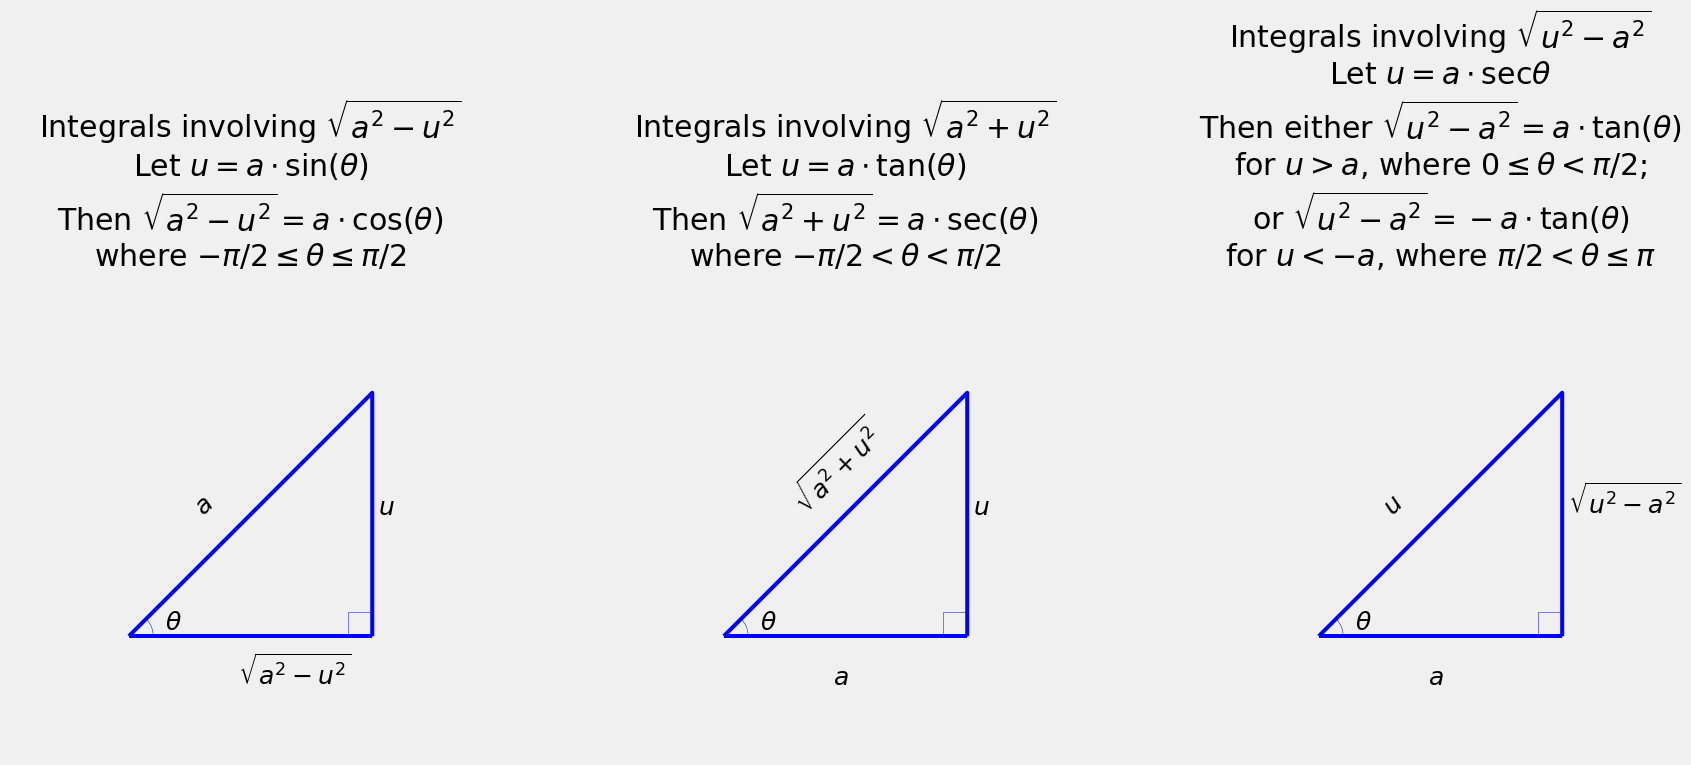

In [2]:
def right_triangle(A, B, C, axis, hyp, leg1, leg2):
    x = [A[0],B[0],C[0]]
    y = [A[1],B[1],C[1]]
    axis.plot(x,y, color ='b')
    axis.plot([A[0],C[0]], [A[1],C[1]], color = 'b')
    axis.annotate(leg1,(.9,-.4), fontsize=25)
    axis.annotate(leg2,(2.05,1), fontsize=25)
    axis.annotate(hyp,(.5,1), fontsize=25, rotation=45)
    rect = patches.Rectangle(
        (1.8,0), width=.2, height=.2, fill=False, edgecolor='b', alpha=1)
    arc = patches.Arc(
        (0,0), width=.4, height=.4, theta1=0, theta2=45,
        fill=False, edgecolor='b', alpha=1)
    axis.annotate(r'$\theta$', (.3,.05), fontsize=25)
    axis.add_artist(rect)
    axis.add_artist(arc)
    axis.set_xticks([])
    axis.set_xlim(min(x)-1,max(x)+1)
    axis.set_yticks([])
    axis.set_ylim(min(y)-1,max(y)+1)
    axis.set_aspect('equal')
    
A = (0,0)
B = (2,2)
C = (2,0)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,10))
right_triangle(A,B,C, ax1,'$a$', '$\sqrt{a^2 - u^2}$', '$u$')
ax1.set_title(
    r'Integrals involving $\sqrt{a^2 - u^2}$'
    + '\n'+ r'Let $u = a \cdot \sin{(\theta)}$'
    + '\n' + r'Then $\sqrt{a^2 - u^2} = a \cdot \cos{(\theta)}$'
    + '\n' + r'where $-\pi/2 \leq \theta \leq \pi/2$', fontsize=30)
right_triangle(A,B,C, ax2, '$\sqrt{a^2 + u^2}$', '$a$', '$u$')
ax2.set_title(
    r'Integrals involving $\sqrt{a^2 + u^2}$'
    + '\n'+ r'Let $u = a \cdot \tan{(\theta)}$'
    + '\n' + r'Then $\sqrt{a^2 + u^2} = a \cdot \sec(\theta)$'
    + '\n' + r'where $-\pi/2 < \theta < \pi/2$', fontsize=30)
right_triangle(A,B,C, ax3, '$u$', '$a$', '$\sqrt{u^2 - a^2}$')
ax3.set_title(
    r'Integrals involving $\sqrt{u^2 - a^2}$'
    + '\n'+ r'Let $u = a \cdot \sec{\theta}$'
    + '\n' + r'Then either $\sqrt{u^2 - a^2} = a \cdot \tan{(\theta)}$'
    + '\n' + r'for $u > a$, where $0 \leq \theta < \pi/2$;'
    + '\n' + r'or $\sqrt{u^2 - a^2} = -a \cdot \tan{(\theta)}$'
    + '\n' + r'for $u < -a$, where $\pi/2 < \theta \leq \pi$', fontsize=30)
plt.tight_layout()

##### Example 1

Find $\displaystyle \int \cfrac{x^3}{\sqrt{x^2 - 25}} \, dx$.

##### Solution:

The integrand has form $\sqrt{x^2 - a^2}$ with $a^2 = 25 \Rightarrow a = 5$.

Therefore, we let $x = a \cdot \sec{\theta} \Rightarrow$ let $x = 5 \sec{\theta}$. Then $du = 5 \sec{\theta} \tan{\theta} \, d\theta$.

Directly substituting:

$$\int \cfrac{x^3}{\sqrt{x^2 - 25}} \, dx = \int \cfrac{(5 \sec{\theta})^3}{\sqrt{(5 \sec{\theta})^2 - 25}} \cdot 5 \sec{\theta} \tan{\theta} \, d\theta$$

Simplifying:

\begin{align}
\int \cfrac{(5 \sec{\theta})^3}{\sqrt{(5 \sec{\theta})^2 - 25}} \cdot 5 \sec{\theta} \tan{\theta} \, d\theta & = \int \cfrac{125 \sec^{3}{\theta}}{\sqrt{25 \sec^{2}{\theta}- 25}} \cdot 5 \sec{\theta} \tan{\theta} \, d\theta \\
& = 125 \int \cfrac{\sec^{3}{\theta}}{\sqrt{25(\sec^{2}{\theta} - 1)}} \cdot 5  \sec{\theta} \tan{\theta} \, d\theta \\
& = 125 \int \cfrac{\sec^{3}{\theta}}{5\sqrt{\sec^{2}{\theta} - 1}} \cdot 5  \sec{\theta} \tan{\theta} \, d\theta \\
& = 125 \int \cfrac{\sec^{3}{\theta}}{\sqrt{\sec^{2}{\theta} - 1}} \cdot \sec{\theta} \tan{\theta} \, d\theta \\
& = 125 \int \cfrac{\sec^{4}{\theta}}{\sqrt{\sec^{2}{\theta} - 1}} \cdot \tan{\theta} \, d\theta
\end{align}

Use the identity $\tan^{2}{\theta} = \sec^{2}{\theta} - 1$:

$$125 \int \cfrac{\sec^{4}{\theta}}{\sqrt{\sec^{2}{\theta} - 1}} \cdot \tan{\theta} \, d\theta = 125 \int \cfrac{\sec^{4}{\theta}}{\sqrt{\tan^{2}{\theta}}} \cdot \tan{\theta} \, d\theta$$

Simplifying:

\begin{align}
125 \int \cfrac{\sec^{4}{\theta}}{\sqrt{\tan^{2}{\theta}}} \cdot \tan{\theta} \, d\theta & = 125 \int \cfrac{\sec^{4}{\theta}}{\tan{\theta}} \cdot \tan{\theta} \, d\theta \\
& = 125 \int \sec^{4}{\theta} \, d\theta
\end{align}

And now we revert to the method of trigonometric integration as in section 8.3.

We have secant to a *positive, even power.* So we break off a $\sec^{2}{\theta}$ and save for a substitution, converting all that remains to tangents:

\begin{align}
125 \int \sec^{4}{\theta} \, d\theta & = 125 \int \underbrace{\sec^{2}{\theta}}_{1 + \tan^{2}{\theta}} \cdot \sec^{2}{\theta} \, d\theta \\
& = 125 \int (1 + \tan^{2}{\theta}) \cdot \sec^{2}{\theta} \, d\theta
\end{align}

Now let $u = \tan{\theta}$. Then $du = \sec^{2}{\theta} \, d\theta$.

Substituting:

$$125 \int (1 + \underbrace{\tan^{2}{\theta}}_{u^2}) \cdot \underbrace{\sec^{2}{\theta} \, d\theta}_{du} = 125 \int (1 + u^2) \, du$$

Integrating:

$$125 \int (1 + u^2) \, du = 125 \left( u + \cfrac{u^3}{3} \right) + C$$

Back substituting:

$$125 \left( u + \cfrac{u^3}{3} \right) + C = 125 \left( \tan{\theta} + \cfrac{\tan^{3}{\theta}}{3} \right) + C$$

We need to back substitute *again* since we are now in $\theta$'s and we need $x$'s. So we need to either construct or recall the type of triangle we have with the appropriate labelings.

Since we used $x = 5 \sec{\theta}$, we have $\sec{\theta} = \cfrac{x}{5}$ or equivalently $\cos{\theta} = \cfrac{5}{x}$. So our triangle should reflect this fact:

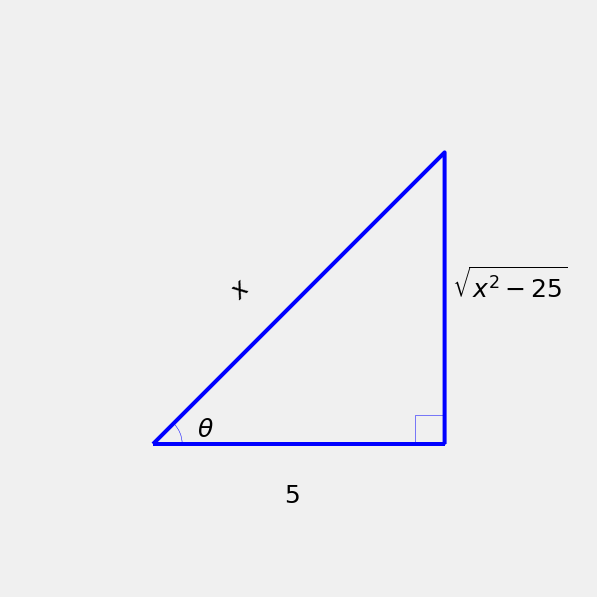

In [3]:
fig, ax = plt.subplots(figsize=(25,10))
right_triangle(A, B, C, ax, '$x$', '$5$', r'$\sqrt{x^2 - 25}$')

Using the above triangle we have that $\tan{\theta} = \cfrac{\sqrt{x^2 - 25}}{5}$.

Back substituting and simplifying:

\begin{align}
\int \cfrac{x^3}{\sqrt{x^2 - 25}} \, dx & = 125 \left( \tan{\theta} + \cfrac{\tan^{3}{\theta}}{3} \right) + C \\
& = 125 \left( \cfrac{\sqrt{x^2 - 25}}{5} + \cfrac{1}{3} \cdot \left( \cfrac{\sqrt{x^2 - 25}}{5} \right)^3 \right) + C \\
& = 125 \left( \cfrac{\sqrt{x^2 - 25}}{5} + \cfrac{1}{3} \cdot \cfrac{(x^2 - 25)^{3/2}}{5^3} \right) + C \\
& = \boxed{25\sqrt{x^2 - 25} + \cfrac{1}{3} (x^2 - 25)^{3/2} + C}
\end{align}

##### Example 2

Find $\displaystyle \int \cfrac{t^2}{\sqrt{1 - t^2}} \, dt$.

##### Solution:

First we recognize what form we have in our integrand: $\sqrt{a^2 - u^2}$

Note: $\underbrace{a^2 - u^2}_{\text{looks like $1 - \sin^{2}{u}$}}$

So we have $a^2 = 1 \Rightarrow a = 1$

Therefore, we let $t = a \cdot \sin{\theta} \Rightarrow$ let $t = \sin{\theta}$. Then $dt = \cos{\theta} \, d\theta$.

We could make note of our triangle here for later back substitution:

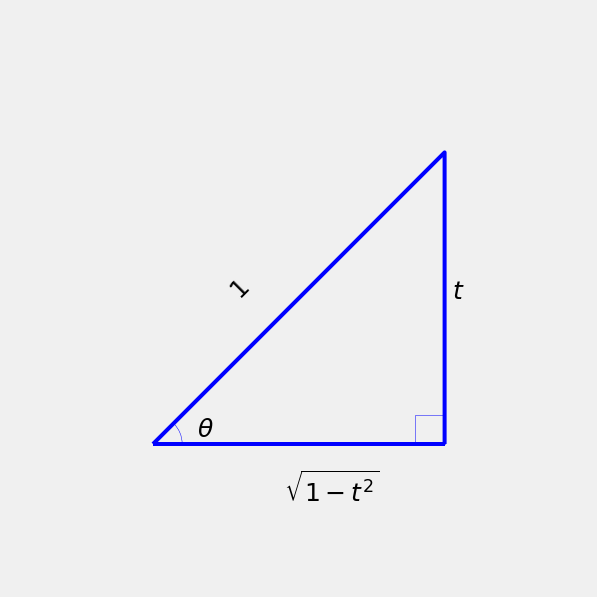

In [4]:
fig, ax = plt.subplots(figsize=(25,10))
right_triangle(A, B, C, ax, '$1$', r'$\sqrt{1 - t^2}$', '$t$')

Using the substitutions above:

$$\int \cfrac{t^2}{\sqrt{1 - t^2}} \, dt = \int \cfrac{(\sin{\theta})^2}{\sqrt{1 - (\sin{\theta})^2}} \cdot \cos{\theta} \, d\theta$$

Simplifying:

$$\int \cfrac{(\sin{\theta})^2}{\sqrt{1 - (\sin{\theta})^2}} \cdot \cos{\theta} \, d\theta = \int \cfrac{\sin^{2}{\theta}}{\sqrt{1 - \sin^{2}{\theta}}} \cdot \cos{\theta} \, d\theta$$

Applying the identity $\cos^{2}{\theta} = 1 - \sin^{2}{\theta}$:

$$\int \cfrac{\sin^{2}{\theta}}{\sqrt{1 - \sin^{2}{\theta}}} \cdot \cos{\theta} \, d\theta = \int \cfrac{\sin^{2}{\theta}}{\sqrt{\cos^{2}{\theta}}} \cdot \cos{\theta} \, d\theta$$

Simplifying:

\begin{align}
\int \cfrac{\sin^{2}{\theta}}{\sqrt{\cos^{2}{\theta}}} \cdot \cos{\theta} \, d\theta & = \int \cfrac{\sin^{2}{\theta}}{\cos{\theta}} \cdot \cos{\theta} \, d\theta \\
& = \int \sin^{2}{\theta} \, d\theta
\end{align}

With even powers of sine we need to make use of our power-reducing identity $\sin^{2}{\theta} = \cfrac{1 - \cos{(2\theta)}}{2}$:

$$\int \sin^{2}{\theta} \, d\theta = \int \cfrac{1 - \cos{(2\theta)}}{2} \, d\theta$$

Factoring:

$$\int \cfrac{1 - \cos{(2\theta)}}{2} \, d\theta = \cfrac{1}{2} \int (1 - \cos{(2\theta)}) \, d\theta$$

Integrating:

$$\cfrac{1}{2} \left( \theta - \cfrac{\sin{(2\theta)}}{2} \right) + C$$

We need to back substitute since we didn't start with $\theta$'s. So we need to know what $\theta$ is in terms of $x$ as well as $\sin{(2\theta)}$.

For $\sin{(2\theta)}$ we can use a double angle identity: $\sin{(2\theta)} = 2 \sin{\theta} \cos{\theta}$.

Note that $\sin{\theta} = t$ and $\cos{\theta} = \cfrac{\sqrt{1 - t^2}}{1} = \sqrt{1 - t^2}$ (based on the triangle).

For $\theta$ we solve from the initial substitution: $t = \sin{\theta} \Rightarrow \theta = \arcsin{t}$.

Therefore, we have

\begin{align}
\int \cfrac{t^2}{\sqrt{1 - t^2}} \, dt & = \cfrac{1}{2} \left( \theta - \cfrac{\overbrace{\sin{(2\theta)}}^{2\sin{\theta}\cos{\theta}}}{2} \right) + C \\
& = \cfrac{1}{2} \left( \theta - \cfrac{1}{2} 2 \sin{\theta} \cos{\theta} \right) + C \\
& = \cfrac{1}{2} \left( \underbrace{\theta}_{\arcsin{t}} - \cfrac{1}{2} 2 \overbrace{\sin{\theta}}^{t} \underbrace{\cos{\theta}}_{\sqrt{1 - t^2}} \right) + C \\
& = \cfrac{1}{2} \left( \arcsin{t} - \cfrac{1}{2} 2 t \sqrt{1 - t^2} \right) + C \\
& = \boxed{\cfrac{1}{2} \left( \arcsin{t} - t \sqrt{1 - t^2} \right) + C}
\end{align}

##### Example 3

Find $\displaystyle \int \cfrac{\sqrt{x^2 + 1}}{x} \, dx$

##### Solution:

Again, we first identify what form we have: $\sqrt{u^2 + a^2}$.

Note: $u^2 + a^2 = \underbrace{a^2 + u^2}_{\text{looks like $1 + \tan^{2}{\theta}$}}$

So we have $a^2 = 1 \Rightarrow a = 1$.

Therefore, we let $x = \tan{\theta}$. Then $dx = \sec^{2}{\theta} \, d\theta$.

We could make note of our triangle here for later back substitution:

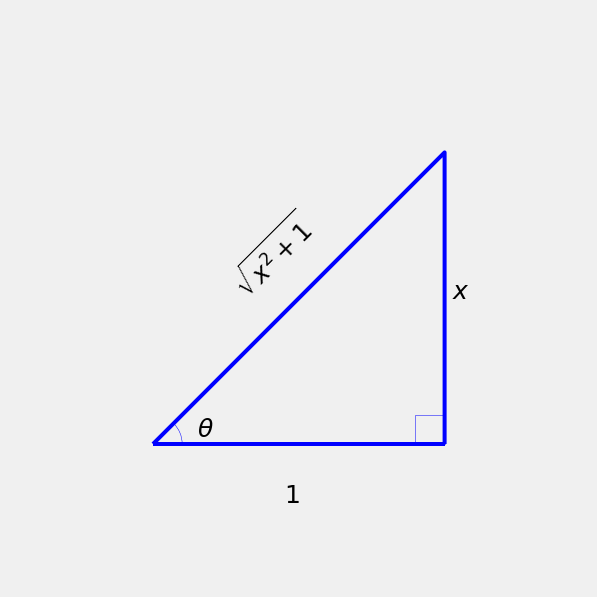

In [5]:
fig, ax = plt.subplots(figsize=(25,10))
right_triangle(A, B, C, ax, r'$\sqrt{x^2 + 1}$', '$1$', '$x$')

Using the substitution above:

$$\int \cfrac{\sqrt{x^2 + 1}}{x} \, dx = \int \cfrac{\sqrt{\tan^{2}{\theta} + 1}}{\tan{\theta}} \cdot \sec^{2}{\theta} \, d\theta$$

Using the identity $\sec^{2}{\theta} = \tan^{2}{\theta} + 1$:

$$\int \cfrac{\sqrt{\tan^{2}{\theta} + 1}}{\tan{\theta}} \cdot \sec^{2}{\theta} \, d\theta = \int \cfrac{\sqrt{\sec^{2}{\theta}}}{\tan{\theta}} \cdot \sec^{2}{\theta} \, d\theta$$

Simplifying:

\begin{align}
\int \cfrac{\sqrt{\sec^{2}{\theta}}}{\tan{\theta}} \cdot \sec^{2}{\theta} \, d\theta & = \int \cfrac{\sec{\theta}}{\tan{\theta}} \cdot \sec^{2}{\theta} \, d\theta \\
& = \int \cfrac{\sec^{3}{\theta}}{\tan{\theta}} \, d\theta
\end{align}

We don't have secant to a *positive, even power* nor do we have tangent to a *positive, odd power* from our first two guidelines from section 8.3 for integrals involving secants and tangents. So we'll convert to sines and cosines.

Converting to sines and cosines:

\begin{align}
\int \cfrac{\sec^{3}{\theta}}{\tan{\theta}} \, d\theta & = \int \cfrac{\cfrac{1}{\cos^{3}{\theta}}}{\cfrac{\sin{\theta}}{\cos{\theta}}} \, d\theta \\
& = \int \cfrac{1}{\cos^{3}{\theta}} \cdot \cfrac{\cos{\theta}}{\sin{\theta}} \, d\theta \\
& = \int \cfrac{1}{\cos^{2}{\theta}} \cdot \cfrac{1}{\sin{\theta}} \, d\theta 
\end{align}

So now we have sines and cosines, but no positive powers! So now what...?

Play with it a bit:

\begin{align}
\int \cfrac{1}{\cos^{2}{\theta}} \cdot \cfrac{1}{\sin{\theta}} \, d\theta & = \int \sec^{2}{\theta} \cdot \csc{\theta} \, d\theta \\
& = \int (1 + \tan^{2}{\theta}) \cdot \csc{\theta} \, d\theta \\
& = \int (\csc{\theta} + \csc{\theta} \tan^{2}{\theta}) \, d\theta \\
& = \underbrace{\int \csc{\theta} \, d\theta}_{\text{integration formula?}} + \underbrace{\int \csc{\theta} \tan^{2}{\theta} \, d\theta}_{\text{convert to sines and cosines?}} \\
\end{align}

From integration formulas: $\int \csc{\theta} \, d\theta = - \ln{| \csc{\theta} + \cot{\theta} |} + C$.

So the first integral is known.

Now we convert the second integral to sines and cosines and see where that takes us:

\begin{align}
\int \csc{\theta} \tan^{2}{\theta} \, d\theta & = \int \cfrac{1}{\sin{\theta}} \cdot \cfrac{\sin^{2}{\theta}}{\cos^{2}{\theta}} \, d\theta \\
& = \int \cfrac{\sin{\theta}}{\cos^{2}{\theta}} \, d\theta
\end{align}

This is great news! We can just use a $u$ subsitituion: let $u = \cos{\theta}$, then $du = - \sin{\theta} \, d\theta \Rightarrow - du = \sin{\theta} \, d\theta$.

Substituting:

\begin{align}
\int \cfrac{\sin{\theta}}{\cos^{2}{\theta}} \, d\theta & = \int \cfrac{1}{\cos^{2}{\theta}} \cdot \sin{\theta} \, d\theta \\
& = \int \cfrac{1}{\underbrace{\cos^{2}{\theta}}_{u^2}} \cdot \overbrace{\sin{\theta} \, d\theta}^{-du} \\
& = - \int \cfrac{1}{u^{2}} du
\end{align}

Simplifying and integrating:

\begin{align}
- \int \cfrac{1}{u^{2}} du & = - \int u^{-2} du \\
& = - \cfrac{u^{-1}}{-1} + C \\
& = u^{-1} + C \\
& = \cfrac{1}{u} + C
\end{align}

Back substituting for $u$:

$$\cfrac{1}{u} + C = \cfrac{1}{\cos{\theta}} + C = \sec{\theta} + C$$

Now we combine the two integrals:

\begin{align}
\int \cfrac{\sqrt{x^2 + 1}}{x} \, dx & = \int \csc{\theta} \, d\theta + \int \csc{\theta} \tan^{2}{\theta} \, d\theta \\
& = - \ln{| \csc{\theta} + \cot{\theta} |} + \sec{\theta} + C
\end{align}

Finally, we back substitute $\theta$ to obtain our result in terms of $x$:

According to our triangle we have $\csc{\theta} = $

\begin{align}
\int \cfrac{\sqrt{x^2 + 1}}{x} \, dx & = - \ln{| \csc{\theta} + \cot{\theta} |} + \sec{\theta} + C \\
& = \boxed{- \ln{\left| \cfrac{\sqrt{x^2 + 1}}{x} + \cfrac{1}{x} \right|} + \sqrt{x^2 + 1} + C}
\end{align}

##### Example 4

Find the definite integral $\displaystyle \int_{0}^{\sqrt{3}/2} \cfrac{t^2}{(1 - t^2)^{3/2}} \, dt$.

##### Solution:

We don't have a root, however, we do have something of the form $a^2 - t^2$ in the denominated with a power of $3/2$.

Since $a^2 - t^2$ looks like $1 - \sin^{2}{\theta}$, we'll try letting $t = \sin{\theta}$. Then $dt = \cos{\theta} \, d\theta$.

Substituting:

$$\int_{0}^{\sqrt{3}/2} \cfrac{t^2}{(1 - t^2)^{3/2}} \, dt = \int_{t=0}^{t=\sqrt{3}/2} \cfrac{\sin^{2}{\theta}}{(1 - \sin^{2}{\theta})^{3/2}} \cdot \cos{\theta} \, d\theta$$

**Importain note:** if we substitute the limits of integration ($t = 0$ and $t = \sqrt{3}/2$) for appropriate values of $\theta$, we don't need a triangle for back substitution! Of course, this only works for definite integrals...

If $t = 0$, then $0 = \sin{\theta} \Rightarrow \theta = 0$. If $t = \sqrt{3}/2$, then $\sqrt{3}/2 = \sin{\theta} \Rightarrow \theta = \pi/3$.

Substituting the limits of integration:

$$\int_{0}^{\sqrt{3}/2} \cfrac{t^2}{(1 - t^2)^{3/2}} \, dt = \int_{0}^{\pi/3} \cfrac{\sin^{2}{\theta}}{(1 - \sin^{2}{\theta})^{3/2}} \cdot \cos{\theta} \, d\theta$$

Using the identity $\cos^{2}{\theta} = 1 - \sin^{2}{\theta}$:

\begin{align}
\int_{0}^{\pi/3} \cfrac{\sin^{2}{\theta}}{(1 - \sin^{2}{\theta})^{3/2}} \cdot \cos{\theta} \, d\theta & = \int_{0}^{\pi/3} \cfrac{\sin^{2}{\theta}}{(\cos^{2}{\theta})^{3/2}} \cdot \cos{\theta} \, d\theta \\
& = \int_{0}^{\pi/3} \cfrac{\sin^{2}{\theta}}{\cos^{3}{\theta}} \cdot \cos{\theta} \, d\theta \\
& = \int_{0}^{\pi/3} \cfrac{\sin^{2}{\theta}}{\cos^{2}{\theta}} \, d\theta \\
& = \int_{0}^{\pi/3} \tan^{2}{\theta} \, d\theta
\end{align}

Now use the identity $\tan^{2}{\theta} = \sec^{2}{\theta} - 1$:

\begin{align}
\int_{0}^{\pi/3} \tan^{2}{\theta} \, d\theta & = \int_{0}^{\pi/3} (\sec^{2}{\theta} - 1) \, d\theta \\
& = \int_{0}^{\pi/3} \sec^{2}{\theta} \, d\theta - \int_0^{\pi/3} \, d\theta
\end{align}

Integrating:

\begin{align}
\int_{0}^{\sqrt{3}/2} \cfrac{t^2}{(1 - t^2)^{3/2}} \, dt & = \int_{0}^{\pi/3} \sec^{2}{\theta} \, d\theta - \int_0^{\pi/3} \, d\theta \\
& = \tan{\theta} \Big|_0^{\pi/3} - \theta \Big|_0^{\pi/3} \\
& = (\tan{\pi/3} - \tan{0}) - (\pi/3 - 0) \\
& = \boxed{\sqrt{3} - \pi/3} \\
& \approx \boxed{0.6895}
\end{align}

##### End of Section